# **Dog Breed Classification Project**

The objective of this project is to build a model that can classify images of dogs by their respective breed type. The train set includes 10222 photos of dogs, and the test set includes 10357 images of dogs. There is a total of 120 different dog breeds in the photos. 

Because I don't have a GPU resource on my computer, I have to use Google Colab to complete this project. The first step is to link this Google Colab script to my Google Drive.

## Connect Google Colab to Google Drive

In [5]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

gpg: keybox '/tmp/tmppvdhjc_y/pubring.gpg' created
gpg: /tmp/tmppvdhjc_y/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1


In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p my_drive
!google-drive-ocamlfuse my_drive

## Upload Train Images
Now that this script is linked to Google Drive I have to upload all of the relevant files to my Drive. These files include the 10222 train photos of dogs, the 10357 test photos, the labels.csv file and the sample submission.scv file. We'll start with uploading all of the photos in the train dataset.

In [77]:
# Get working directory
import os
cwd = os.getcwd()
cwd

'/content/my_drive/tut_kaggle'

In [0]:
# Enter Proper Directory
os.chdir('my_drive')
os.chdir('tut_kaggle')
os.chdir('train')

In [0]:
#Load relevant libraries
import matplotlib.pyplot as plt
import numpy 
import cv2
import os
import glob
import time
import numpy as np
%matplotlib inline

In [0]:
# Create files varibale that includes all the .jpg image files in that folder using the glob function.
files = sorted(glob.glob('*.jpg'))

In [0]:
len(files)

10222

In [0]:
files[0]

'000bec180eb18c7604dcecc8fe0dba07.jpg'

Next we have to upload all of the image files and resize them. I'm choosing to resize them to be 100x100.

In [0]:
#Upload all the files. This step took about 90 minutes.

t0=time.time()

def rescale(im):
    return cv2.resize(im, (100,100), interpolation = cv2.INTER_AREA)

X=[]

for files in files:
    X.append(rescale(plt.imread(files)))

In [0]:
#Format image data into numpy arrays.
X = np.array(X)
print(X.shape)

(10222, 100, 100, 3)


The next step is very important when working in Google Colab. Once the images are uploaded and formatted in numpy arrays we want to save the image data into a hdf5 file in our drive. If we don't do this, we will have to restart the upload process everytime we open colab. This is one of the disadvantages to using Google's GPU service, but the workaround below takes care of the problem.

In [0]:
# Creat .hdf5 file with all of the image data included.
import h5py
with h5py.File('traindata.hdf5','w') as f:
    f.create_dataset('X', data=X)

In [0]:
#Enter the "my_drive" directory.
os.chdir('/content/my_drive')

The code below is what calls up the image data we saved in an .hdf5 file, the the upload code above shouldn't be run everytime we log on to colab.

In [81]:
import h5py
filename = 'traindata.hdf5'
f = h5py.File(filename, 'r')

# List all groups
print("Keys: %s" % f.keys())
a_group_key = list(f.keys())[0]

# Get the data
data = list(f[a_group_key])

Keys: KeysView(<HDF5 file "traindata.hdf5" (mode r)>)


In [0]:
#Re-create numpy array of the data.
data = np.array(data)

In [0]:
import pandas as pd

## Image Labels
We now have to upload the image labels and append them to our image data.

In [0]:
os.chdir('/content/my_drive/tut_kaggle/')

In [0]:
ls

labels.csv  sample_submission.csv  testdata2.hdf5  testdata.hdf5
my_drive/   submission2.csv        testdata3.hdf5  train/


In [0]:
# Upload labels csv
labels = pd.read_csv('labels.csv')

In [0]:
labels.head(5)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [0]:
# Create list of all labels
breed = labels["breed"]

In [0]:
print(breed.shape)

(10222,)


In [0]:
print(breed.dtype)

object


In [0]:
# Create list of unique labels
uniquelabels = []
for i in breed:
  if i not in uniquelabels:
    uniquelabels.append(i)

In [0]:
uniquelabels[6]

'borzoi'

In [0]:
# Create unique label map
count = 0
uniquelabelMaps = []

uniquelabels.sort()
for i in uniquelabels:
  uniquelabelMaps.append([i, count])
  count +=1

In [0]:
len(uniquelabels)

120

In [0]:
uniquelabels

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [0]:
len(uniquelabelMaps)

120

As seen above, now have a list of 120 unique labels in alphabetical order. Let's now get a value count of haw many images there are for each cooresponding label.

In [0]:
# Value Counts
for i in range(len(breed)):
  for j in uniquelabelMaps:
    if breed[i] == j[0]:
      breed[i] = j[1]
      break

In [0]:
print(breed)

0         19
1         37
2         85
3         15
4         49
5         10
6         10
7         18
8          7
9         97
10        99
11       113
12        73
13        15
14        79
15         2
16       118
17        89
18        68
19        21
20        38
21        83
22        83
23        10
24        37
25        49
26       106
27        58
28        12
29        26
        ... 
10192     17
10193      5
10194    116
10195      7
10196     21
10197      0
10198     49
10199    117
10200     73
10201     10
10202     98
10203      0
10204     73
10205     41
10206     59
10207      7
10208     39
10209    114
10210     51
10211     56
10212    109
10213     39
10214     23
10215      3
10216     94
10217     18
10218     35
10219      3
10220     75
10221     28
Name: breed, Length: 10222, dtype: object


In [22]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
# Create Categorical Dummy Variables for each label.
breed = to_categorical(breed)

In [0]:
breed.shape

(10222, 120)

In [0]:
# Create Numpy Array
y = np.array(breed)

In [0]:
y.shape

(10222, 120)

We now  have a numpy array of 10222 observations of 120 variables. Let's plot a few photos to make sure they turned out okay.

In [0]:
import matplotlib.pyplot as plt
import numpy 
import cv2
import os
import glob
import time
import numpy as np
%matplotlib inline

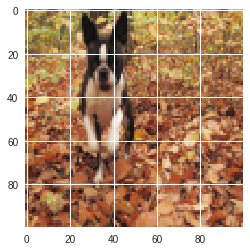

In [0]:
plt.imshow(data[0])

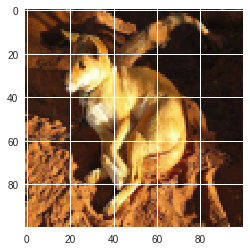

In [0]:
plt.imshow(data[1])

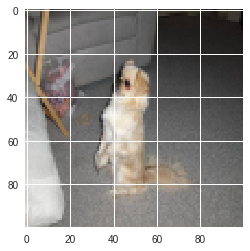

In [0]:
plt.imshow(data[2])

## Preprocessing Image Data
The dog photos turned out okay. Now let's normalize the image data so our models can run more efficiently.

In [91]:
# Shuffle the data.
ind = np.array(list(range(10222)))
np.random.shuffle(ind)
print(ind[:10])

[5196 4162 1612 1228  232 7777 9709 2590 9752  578]


In [0]:
Xs = data[ind]
Ys = y[ind]

In [0]:
# Normalize data.
Xs = (Xs-127.5)/255

In [0]:
print(Xs.dtype)
print(Xs.mean())
print(Xs.max())
print(Xs.min())
print(Xs.nbytes/10**9)

float64
-0.0596221843313727
0.5
-0.5
2.45328


In [94]:
# Change data type to 'float32' to save space.
Xs = Xs.astype('float32')
print(Xs.dtype)
print(Xs.nbytes/10**9)

float32
1.22664


## Upload Test Data

We'll use the same steps as above.

In [0]:
# Get relevant directory in Drive
os.chdir('/content/my_drive/test')

In [0]:
# Grab image files using glob.
files2 = sorted(glob.glob('*.jpg'))

In [0]:
# Upload and rescale image data to 100x100, and create .hdf5 file in drive.
def rescale(im):
  return cv2.resize(im, (100,100), interpolation = cv2.INTER_AREA)

X_test=[]

for files2 in files2:
    X_test.append(rescale(plt.imread(files2)))
    
X_testy = np.array(X_test)
print(X_testy.shape)

import h5py
with h5py.File('testdata3.hdf5','w') as f:
    f.create_dataset('X_test', data=X_testy)

(10357, 100, 100, 3)


In [0]:
# Get directory
os.chdir('/content/my_drive/tut_kaggle')

In [98]:
# Upload data from .hdf5 file. (Reminder that this step alone will do the trick when re-opening Colab.)
import h5py
filename = 'testdata3.hdf5'
f = h5py.File(filename, 'r')

# List all groups
print("Keys: %s" % f.keys())
a_group_key = list(f.keys())[0]

# Get the data
X_testy = list(f[a_group_key])

Keys: KeysView(<HDF5 file "testdata3.hdf5" (mode r)>)


In [99]:
# Re-Create numpy array
X_testy = np.array(X_testy)
print(X_testy.shape)

(10357, 100, 100, 3)


## Preprocess test data.

In [0]:
testdatar = X_testy

In [0]:
testdatar.shape

(10357, 100, 100, 3)

In [0]:
testdatar.max()

255

In [0]:
# Normalize
test = (testdatar-127.5)/255

In [0]:
print(test.dtype)
print(test.mean())
print(test.max())
print(test.min())
print(test.nbytes/10**9)

float64
-0.06071449130107451
0.5
-0.5
2.48568


In [102]:
# Save space.
test = test.astype('float32')
print(test.dtype)
print(test.nbytes/10**9)

float32
1.24284


## Build Model
Now that we've proprocessed our data, it's time to build some models to see if we can correctly classify these images.

In [0]:
# Import relevant libraries.

import time
import numpy
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, concatenate, Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras
import time
import numpy
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K
from keras.optimizers import Adam

The first model below is the culmination of many models that I tried and has the best validation accuracy of all of the my sequential model attempts. It includes 7 layers and uses batachnormalization and dropout methods to try to mitigate overfitting.

In [0]:
def BN_model():

    model = Sequential()
    model.add(Conv2D(32, 3, input_shape=(100, 100, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, 3))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(16, 3))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(16, 3))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(120))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(120))
    model.add(Activation('softmax'))
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

# build the model
model = BN_model()

# Fit the model
model.fit(Xs, Ys, validation_split=.2, nb_epoch=50, batch_size=200, verbose=2)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 8177 samples, validate on 2045 samples
Epoch 1/50
 - 17s - loss: 4.9302 - acc: 0.0117 - val_loss: 4.8550 - val_acc: 0.0240
Epoch 2/50
 - 13s - loss: 4.6568 - acc: 0.0279 - val_loss: 4.5883 - val_acc: 0.0362
Epoch 3/50
 - 13s - loss: 4.4558 - acc: 0.0466 - val_loss: 4.4883 - val_acc: 0.0425
Epoch 4/50
 - 13s - loss: 4.3040 - acc: 0.0611 - val_loss: 4.4142 - val_acc: 0.0411
Epoch 5/50
 - 13s - loss: 4.1614 - acc: 0.0810 - val_loss: 4.3173 - val_acc: 0.0533
Epoch 6/50
 - 13s - loss: 4.0261 - acc: 0.1087 - val_loss: 4.3191 - val_acc: 0.0626
Epoch 7/50
 - 13s - loss: 3.9027 - acc: 0.1263 - val_loss: 4.2514 - val_acc: 0.0587
Epoch 8/50
 - 13s - loss: 3.7842 - acc: 0.1448 - val_loss: 4.2838 - val_acc: 0.0597
Epoch 9/50
 - 13s - loss: 3.6632 - acc: 0.1667 - val_loss: 4.1952 - val_acc: 0.0636
Epoch 10/50
 - 13s - loss: 3.5289 - acc: 0.1936 - val_loss: 4.2072 - val_acc: 0.0626
Epoch 11/50
 - 13s - loss: 3.4153 - acc: 0.2105 - val_loss: 4.1704 - val_acc: 0.0714
Epoch 12/50
 - 13s - loss:

 - 13s - loss: 1.1884 - acc: 0.6853 - val_loss: 4.8346 - val_acc: 0.0650
Epoch 35/50
 - 13s - loss: 1.1453 - acc: 0.6927 - val_loss: 4.8905 - val_acc: 0.0675
Epoch 36/50
 - 13s - loss: 1.1161 - acc: 0.6907 - val_loss: 4.8605 - val_acc: 0.0685
Epoch 37/50
 - 13s - loss: 1.0581 - acc: 0.7132 - val_loss: 4.9820 - val_acc: 0.0670
Epoch 38/50
 - 13s - loss: 1.0458 - acc: 0.7182 - val_loss: 4.9011 - val_acc: 0.0743
Epoch 39/50
 - 13s - loss: 0.9729 - acc: 0.7334 - val_loss: 5.0330 - val_acc: 0.0655
Epoch 40/50
 - 13s - loss: 0.9440 - acc: 0.7465 - val_loss: 4.9877 - val_acc: 0.0670
Epoch 41/50
 - 13s - loss: 0.9258 - acc: 0.7475 - val_loss: 5.0213 - val_acc: 0.0714
Epoch 42/50
 - 13s - loss: 0.8848 - acc: 0.7566 - val_loss: 4.9889 - val_acc: 0.0714
Epoch 43/50
 - 13s - loss: 0.8868 - acc: 0.7559 - val_loss: 5.0200 - val_acc: 0.0729
Epoch 44/50
 - 13s - loss: 0.8627 - acc: 0.7598 - val_loss: 5.0894 - val_acc: 0.0670
Epoch 45/50
 - 13s - loss: 0.8648 - acc: 0.7642 - val_loss: 5.1693 - val_acc:

As seen above, this model yielded a training accuracy of almost 80%, but the validation accuracy is only 7%. It should be noted that a random model with no accuracy would only get 1/120 correct. Classifying images into 120 categories is very difficult. The next model that I tried used the functional API method. The Inception2BN model has 6 layers, and the data is passed through this model twice. After which the data is passed through two dense layers as well. 

In [0]:
def inception2BN(x, n = 32):
    p1 = Conv2D(n, 1, padding='same')(x)
    p1 = BatchNormalization()(p1)
    p1 = Activation('relu')(p1)
    p2 = Conv2D(n, 1, padding='same')(x)
    p2 = BatchNormalization()(p2)
    p2 = Activation('relu')(p2)
    p2 = Conv2D(n, 3, padding='same')(p2)
    p2 = BatchNormalization()(p2)
    p2 = Activation('relu')(p2)    
    p3 = Conv2D(n, 1, padding='same')(x)
    p3 = BatchNormalization()(p3)
    p3 = Activation('relu')(p3)    
    p3 = Conv2D(n, 5, padding='same')(p3)
    p3 = BatchNormalization()(p3)
    p3 = Activation('relu')(p3)  
    p4 = MaxPooling2D((3,3), strides=(1, 1), padding='same')(x)    
    p4 = Conv2D(n, 1, padding='same')(p4)
    p4 = BatchNormalization()(p4)
    p4 = Activation('relu')(p4)     

    c =  Concatenate(axis=-1)([p1,p2,p3,p4])
    return c

In [52]:
def model3():
  inputs = Input(shape = (100, 100, 3))
  i1 = inception2BN(inputs)
  mp1 = MaxPooling2D((2,2))(i1)
  i2 = inception2BN(mp1)
  mp2 = MaxPooling2D((2,2))(i2) 
  f = Flatten()(mp2)
  d = Dense(128)(f)
  d = BatchNormalization()(d)
  d = Activation('relu')(d)
  out = Dense(120, activation='softmax')(d)
  model = Model(inputs, out)
  return model

model3 = model3()
adam = Adam(lr=0.001)
model3.compile(loss= 'categorical_crossentropy' , optimizer= adam , metrics=[ 'accuracy' ])


t0=time.time()
log3 = model3.fit(Xs, Ys, validation_split=0.2, epochs=50, batch_size=200, verbose=2)
t1=time.time()
print(t1-t0," seconds")


scores3 = model3.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores3[1]*100))

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(log3.history['acc'],'b') 
plt.plot(log3.history['val_acc'],'r')
plt.show()

Train on 8177 samples, validate on 2045 samples
Epoch 1/50
 - 56s - loss: 4.6843 - acc: 0.0362 - val_loss: 4.5432 - val_acc: 0.0455
Epoch 2/50
 - 47s - loss: 3.9329 - acc: 0.1616 - val_loss: 4.5143 - val_acc: 0.0386
Epoch 3/50
 - 47s - loss: 3.0575 - acc: 0.4385 - val_loss: 4.6794 - val_acc: 0.0298
Epoch 4/50
 - 47s - loss: 1.6847 - acc: 0.8700 - val_loss: 5.0457 - val_acc: 0.0181
Epoch 5/50
 - 47s - loss: 0.5155 - acc: 0.9921 - val_loss: 5.0756 - val_acc: 0.0259
Epoch 6/50
 - 47s - loss: 0.1095 - acc: 0.9990 - val_loss: 4.9070 - val_acc: 0.0293
Epoch 7/50
 - 47s - loss: 0.0412 - acc: 0.9989 - val_loss: 4.7950 - val_acc: 0.0357
Epoch 8/50
 - 47s - loss: 0.0274 - acc: 0.9991 - val_loss: 4.6682 - val_acc: 0.0479
Epoch 9/50
 - 47s - loss: 0.0210 - acc: 0.9991 - val_loss: 4.5556 - val_acc: 0.0548
Epoch 10/50
 - 47s - loss: 0.0171 - acc: 0.9991 - val_loss: 4.4920 - val_acc: 0.0689
Epoch 11/50
 - 47s - loss: 0.0151 - acc: 0.9989 - val_loss: 4.4778 - val_acc: 0.0660
Epoch 12/50
 - 47s - loss:

 - 47s - loss: 0.0027 - acc: 0.9991 - val_loss: 4.5834 - val_acc: 0.0704
Epoch 35/50
 - 47s - loss: 0.0027 - acc: 0.9994 - val_loss: 4.5722 - val_acc: 0.0699
Epoch 36/50
 - 47s - loss: 0.0023 - acc: 0.9995 - val_loss: 4.5865 - val_acc: 0.0714
Epoch 37/50
 - 47s - loss: 0.0026 - acc: 0.9994 - val_loss: 4.5839 - val_acc: 0.0704
Epoch 38/50
 - 47s - loss: 0.0024 - acc: 0.9991 - val_loss: 4.5871 - val_acc: 0.0729
Epoch 39/50
 - 47s - loss: 0.0023 - acc: 0.9994 - val_loss: 4.5798 - val_acc: 0.0778
Epoch 40/50
 - 47s - loss: 0.0025 - acc: 0.9991 - val_loss: 4.5899 - val_acc: 0.0714
Epoch 41/50
 - 47s - loss: 0.0021 - acc: 0.9994 - val_loss: 4.5969 - val_acc: 0.0733
Epoch 42/50
 - 47s - loss: 0.0024 - acc: 0.9994 - val_loss: 4.6000 - val_acc: 0.0733
Epoch 43/50
 - 47s - loss: 0.0019 - acc: 0.9993 - val_loss: 4.6115 - val_acc: 0.0714
Epoch 44/50
 - 47s - loss: 0.0019 - acc: 0.9993 - val_loss: 4.6172 - val_acc: 0.0689
Epoch 45/50
 - 47s - loss: 0.0017 - acc: 0.9994 - val_loss: 4.6179 - val_acc:

NameError: ignored

As seen above, this model had very similar validation accuracy to the sequential mode.

## Vgg16 Model
Because I'm having trouble getting my validation accuracy above about 7%, I'm going to try one of the pre-trained Keras models to see if I can improve the accuracy of my model. The Vgg16 model has already been trained to classify cat and dog images - let's see if we can tune it up and improve our accuracy. I got help on this part of the project from the wonderful YouTube channel called "DeepLizard"

In [0]:
#Load data, change input layer to the dimensions of our images.
vgg16_model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(100,100,3))

In [54]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

The standard model summay from Keras is shown above.

In [0]:
type(vgg16_model)

keras.engine.training.Model

Let's change the model to a sequential model so we can modify it to fit our needs.

In [0]:
# Change to sequential
model = Sequential()
for layer in vgg16_model.layers:
  model.add(layer)

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

We need to remove the last layer of the model so we can insert the correct outputs for our model.

In [57]:
model.layers.pop()

In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

As shown above, the last layer has been removed. We now have to flatten the model so our images can be fed through properly. We'll also add a dense layer with the shape of 120 and a softmax activation. We add this layer because our data has a shape of 120.

In [0]:
for layer in model.layers:
  layer.trainable = False

In [0]:
# Flatten model
  model.add(Flatten())

In [0]:
# Add dense layer
model.add(Dense(120, activation = 'softmax'))

In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

This looks right, let's see how it runs.

In [0]:
# Compile model using same parameters as above.
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

In [64]:
model.fit(Xs, Ys, validation_split=.2, nb_epoch=50, batch_size=200, verbose=2)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 8177 samples, validate on 2045 samples
Epoch 1/50
 - 29s - loss: 4.6047 - acc: 0.0443 - val_loss: 4.2708 - val_acc: 0.0880
Epoch 2/50
 - 21s - loss: 3.5016 - acc: 0.2386 - val_loss: 3.9653 - val_acc: 0.1247
Epoch 3/50
 - 21s - loss: 2.9047 - acc: 0.3778 - val_loss: 3.8250 - val_acc: 0.1540
Epoch 4/50
 - 21s - loss: 2.4729 - acc: 0.4878 - val_loss: 3.7544 - val_acc: 0.1697
Epoch 5/50
 - 21s - loss: 2.1494 - acc: 0.5709 - val_loss: 3.7142 - val_acc: 0.1707
Epoch 6/50
 - 21s - loss: 1.8542 - acc: 0.6531 - val_loss: 3.6899 - val_acc: 0.1731
Epoch 7/50
 - 21s - loss: 1.6283 - acc: 0.7158 - val_loss: 3.6617 - val_acc: 0.1775
Epoch 8/50
 - 21s - loss: 1.4364 - acc: 0.7742 - val_loss: 3.7030 - val_acc: 0.1785
Epoch 9/50
 - 21s - loss: 1.2639 - acc: 0.8161 - val_loss: 3.6829 - val_acc: 0.1765
Epoch 10/50
 - 21s - loss: 1.1176 - acc: 0.8565 - val_loss: 3.6957 - val_acc: 0.1760
Epoch 11/50
 - 21s - loss: 0.9932 - acc: 0.8848 - val_loss: 3.6939 - val_acc: 0.1829
Epoch 12/50
 - 21s - loss:

 - 21s - loss: 0.1221 - acc: 0.9989 - val_loss: 4.0752 - val_acc: 0.1809
Epoch 35/50
 - 21s - loss: 0.1145 - acc: 0.9989 - val_loss: 4.0842 - val_acc: 0.1795
Epoch 36/50
 - 21s - loss: 0.1083 - acc: 0.9989 - val_loss: 4.1145 - val_acc: 0.1775
Epoch 37/50
 - 21s - loss: 0.1014 - acc: 0.9990 - val_loss: 4.1125 - val_acc: 0.1814
Epoch 38/50
 - 21s - loss: 0.0955 - acc: 0.9989 - val_loss: 4.1306 - val_acc: 0.1853
Epoch 39/50
 - 21s - loss: 0.0907 - acc: 0.9991 - val_loss: 4.1481 - val_acc: 0.1780
Epoch 40/50
 - 21s - loss: 0.0858 - acc: 0.9990 - val_loss: 4.1542 - val_acc: 0.1800
Epoch 41/50
 - 21s - loss: 0.0818 - acc: 0.9990 - val_loss: 4.1703 - val_acc: 0.1756
Epoch 42/50
 - 21s - loss: 0.0779 - acc: 0.9990 - val_loss: 4.1869 - val_acc: 0.1770
Epoch 43/50
 - 21s - loss: 0.0737 - acc: 0.9989 - val_loss: 4.1961 - val_acc: 0.1814
Epoch 44/50
 - 21s - loss: 0.0706 - acc: 0.9989 - val_loss: 4.2113 - val_acc: 0.1819
Epoch 45/50
 - 21s - loss: 0.0673 - acc: 0.9988 - val_loss: 4.2289 - val_acc:

As seen in the results above, this model is yielding much better results. Let's try again with a smaller learning rate.

In [0]:
model2 = Sequential()
for layer in vgg16_model.layers:
  model2.add(layer)
model2.layers.pop()
for layer in model.layers:
  layer.trainable = False
model2.add(Flatten())
model2.add(Dense(120, activation = 'softmax'))
model2.compile(Adam(lr = .0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model2.fit(Xs, Ys, validation_split=.2, nb_epoch=50, batch_size=200, verbose=2)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 8177 samples, validate on 2045 samples
Epoch 1/50
 - 22s - loss: 4.8886 - acc: 0.0127 - val_loss: 4.7398 - val_acc: 0.0156
Epoch 2/50
 - 22s - loss: 4.6262 - acc: 0.0361 - val_loss: 4.6235 - val_acc: 0.0386
Epoch 3/50
 - 22s - loss: 4.4560 - acc: 0.0711 - val_loss: 4.5236 - val_acc: 0.0523
Epoch 4/50
 - 22s - loss: 4.3030 - acc: 0.1015 - val_loss: 4.4376 - val_acc: 0.0714
Epoch 5/50
 - 22s - loss: 4.1610 - acc: 0.1393 - val_loss: 4.3609 - val_acc: 0.0797
Epoch 6/50
 - 22s - loss: 4.0341 - acc: 0.1697 - val_loss: 4.2942 - val_acc: 0.0924
Epoch 7/50
 - 22s - loss: 3.9144 - acc: 0.1951 - val_loss: 4.2322 - val_acc: 0.0973
Epoch 8/50
 - 22s - loss: 3.8040 - acc: 0.2327 - val_loss: 4.1867 - val_acc: 0.1066
Epoch 9/50
 - 22s - loss: 3.7007 - acc: 0.2492 - val_loss: 4.1367 - val_acc: 0.1154
Epoch 10/50
 - 22s - loss: 3.6026 - acc: 0.2823 - val_loss: 4.0925 - val_acc: 0.1242
Epoch 11/50
 - 22s - loss: 3.5126 - acc: 0.3038 - val_loss: 4.0556 - val_acc: 0.1296
Epoch 12/50
 - 22s - loss:

 - 22s - loss: 2.2275 - acc: 0.6181 - val_loss: 3.6932 - val_acc: 0.1804
Epoch 35/50
 - 22s - loss: 2.1900 - acc: 0.6293 - val_loss: 3.6847 - val_acc: 0.1765
Epoch 36/50
 - 22s - loss: 2.1539 - acc: 0.6384 - val_loss: 3.6803 - val_acc: 0.1726
Epoch 37/50
 - 22s - loss: 2.1183 - acc: 0.6473 - val_loss: 3.6752 - val_acc: 0.1751
Epoch 38/50
 - 22s - loss: 2.0838 - acc: 0.6554 - val_loss: 3.6692 - val_acc: 0.1775
Epoch 39/50
 - 22s - loss: 2.0496 - acc: 0.6632 - val_loss: 3.6672 - val_acc: 0.1844
Epoch 40/50
 - 22s - loss: 2.0171 - acc: 0.6697 - val_loss: 3.6608 - val_acc: 0.1790
Epoch 41/50
 - 22s - loss: 1.9850 - acc: 0.6807 - val_loss: 3.6612 - val_acc: 0.1746
Epoch 42/50
 - 22s - loss: 1.9524 - acc: 0.6869 - val_loss: 3.6515 - val_acc: 0.1814
Epoch 43/50
 - 22s - loss: 1.9223 - acc: 0.6974 - val_loss: 3.6504 - val_acc: 0.1804
Epoch 44/50
 - 22s - loss: 1.8918 - acc: 0.7022 - val_loss: 3.6500 - val_acc: 0.1785
Epoch 45/50
 - 22s - loss: 1.8618 - acc: 0.7103 - val_loss: 3.6448 - val_acc:

This yielded very similar results. I think the next step is to perform image augmentation, and perhaps combine multiple pre-trained models. I'm going to work on that in the near future and re-submit results.

## Submission
I'm going to submit the first vgg16 model that we created, because that model yielded the best validation accuracy. First we need to upload the "Sample_submission.csv" file so we can format our submission correctly for Kaggle.

In [0]:
#Get relevant working directory.
os.chdir('/content/my_drive/tut_kaggle/')

In [67]:
ls

labels.csv  sample_submission.csv  testdata2.hdf5  testdata.hdf5
my_drive/   submission2.csv        testdata3.hdf5  train/


In [0]:
# Upload file.
test_data = pd.read_csv('sample_submission.csv')
# Create numpy array
test_data2 = np.array(test_data)
# Make predictions
predictions = model.predict(test, verbose = 2)

In [105]:
# Create dataframe
submission_results = pd.DataFrame(predictions, columns = uniquelabels)
submission_results.head(5)

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,1.029871e-07,0.026485,2.854992e-07,0.000062,0.001684,0.000121,3.374169e-07,1.374754e-05,4.563775e-01,1.939865e-03,...,8.067838e-07,0.000656,2.627414e-04,4.675019e-04,1.794072e-02,2.122698e-01,0.000008,0.002014,0.000292,0.000195
1,1.806938e-07,0.000003,1.184056e-04,0.000002,0.000051,0.000003,1.036907e-05,1.378143e-05,8.925340e-09,1.054341e-05,...,2.200061e-04,0.044369,1.343714e-08,3.002345e-06,1.405251e-07,7.337637e-08,0.000534,0.000449,0.000327,0.000015
2,1.904248e-03,0.272561,1.852485e-05,0.058012,0.002223,0.000452,2.706125e-04,3.499547e-03,4.023209e-05,3.927479e-04,...,1.006897e-04,0.004071,1.257403e-02,2.602124e-03,7.762283e-03,7.978727e-05,0.002640,0.014782,0.000072,0.000026
3,1.016047e-04,0.044698,3.835119e-07,0.000539,0.000027,0.050531,7.081648e-05,1.309693e-02,3.237206e-05,5.393479e-05,...,1.284746e-03,0.000095,1.080312e-03,3.034509e-05,6.162182e-04,7.327430e-04,0.000003,0.060730,0.000052,0.052821
4,5.974626e-05,0.001180,9.322139e-06,0.071071,0.000632,0.000001,4.499826e-04,2.277100e-07,5.235880e-05,7.682187e-07,...,1.048045e-03,0.000002,4.424807e-05,9.222081e-07,1.680054e-05,3.747632e-07,0.001351,0.000007,0.004272,0.000069


In [0]:
# Insert "ID" column
submission_results.insert(0, 'id', test_data['id'])

In [0]:
# Create Submission .csv file
submission_results.to_csv('Finalsubmission.csv', index=False)